In [1]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import random

import utils.plotting as plotting
import utils.utils as utils
import utils.data_utils as data_utils
from utils.data_loaders import get_wake_datasets
from utils.evaluation import test_sklearn_model

In [2]:
FACTORS_FOLDER = "discr_factors_x2_30_y-2_2_step0.125_TIstep0.01_CTstep0.01"
DATA_FOLDER = f"data/{FACTORS_FOLDER}/"
INPUT_VAR_TO_TRAIN_REDUCTION_FACTOR = {'ti': 4, 'ct': 4}
train_reduc_factor_string = "training_factors=" + "-".join([f"{k}{v}" for k, v in INPUT_VAR_TO_TRAIN_REDUCTION_FACTOR.items()])
MODEL_NAME = f"multivariate_LR_{train_reduc_factor_string}" #TODO make the name represent the structure or the parameters of the model
#BEST_MODEL_PATH = f"saved_models/{FACTORS_FOLDER}/{MODEL_NAME}.pt"

CONSIDER_WS = False
COORDS_AS_INPUT = False #multivariate

In [3]:
valid_dataset = None
train_dataset, valid_dataset, test_dataset = get_wake_datasets(DATA_FOLDER,
                                                consider_ws=CONSIDER_WS,
                                                coords_as_input=COORDS_AS_INPUT,
                                                #train_perc=0.7,
                                                #test_perc=0.3,
                                                #validation_perc=0,
                                                input_var_to_train_reduction_factor=INPUT_VAR_TO_TRAIN_REDUCTION_FACTOR)
train_x, train_y = train_dataset.inputs, train_dataset.outputs
test_x, test_y = test_dataset.inputs, test_dataset.outputs
print("Train shapes: ", train_x.shape, train_y.shape)
print("Test shapes: ", test_x.shape, test_y.shape)

if valid_dataset is not None:
    valid_x, valid_y = valid_dataset.inputs, valid_dataset.outputs
    print("Valid shapes: ", valid_x.shape, valid_y.shape)

/Users/niccolomorabito/Library/CloudStorage/GoogleDrive-morabito.1808746@studenti.uniroma1.it/My Drive/BDMA/Semester4 Thesis/Ainslie-surrogate/utils/data_loaders.py:248: UserWarning: 
Ignoring percentages of train-valid-test split (train_perc=0.8, valid_perc=0, test_perc=0.2)
and using the reduction factors for the training set instead:
{'ti': 4, 'ct': 4}
  warnings.warn(


Train shapes:  torch.Size([550, 2]) torch.Size([550, 7168])
Test shapes:  torch.Size([4025, 2]) torch.Size([4025, 7168])
Valid shapes:  torch.Size([4025, 2]) torch.Size([4025, 7168])


# Training

In [4]:
model = LinearRegression()
model.fit(train_x, train_y)

LinearRegression()

# Testing

In [5]:
test_sklearn_model(model, test_x, test_y,
                   model_description=MODEL_NAME+"_"+FACTORS_FOLDER,
                   save_results=True)

Test results for multivariate_LR_training_factors=ti4-ct4_discr_factors_x2_30_y-2_2_step0.125_TIstep0.01_CTstep0.01
r2_score=0.7518254679638867
explained_variance_score=0.7525081579057898
mean_squared_error=0.00017378944903612137
mean_absolute_error=0.0063125393353402615
median_absolute_error=0.005538563709706068
mean_absolute_percentage_error=362180706304.0
Prediction time=3.90494684254901e-05s


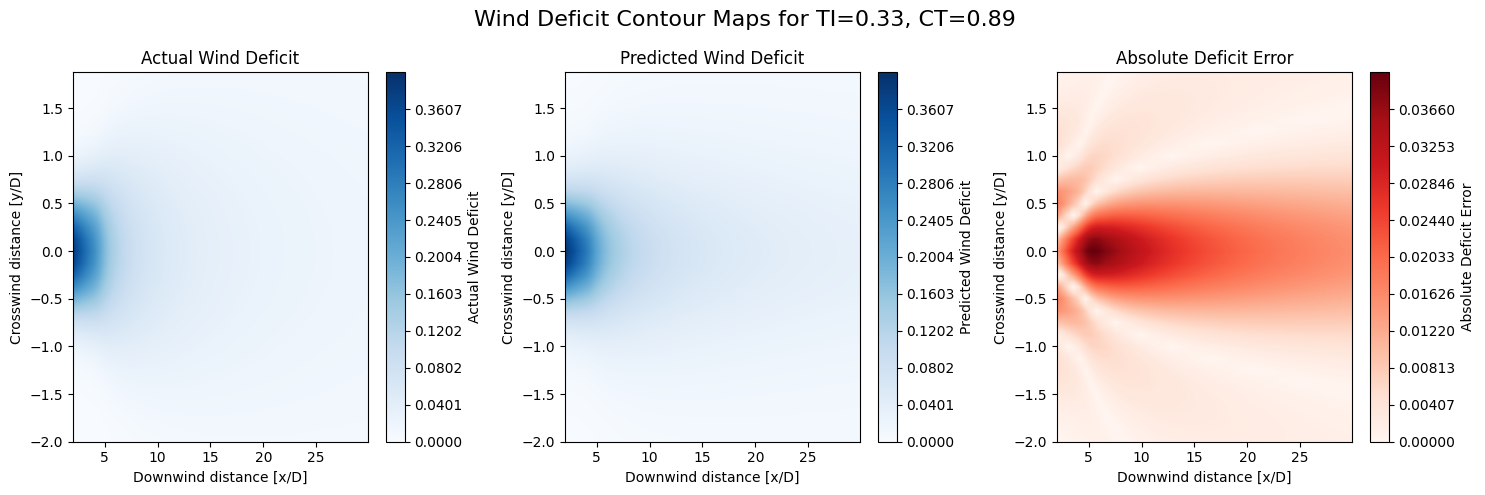

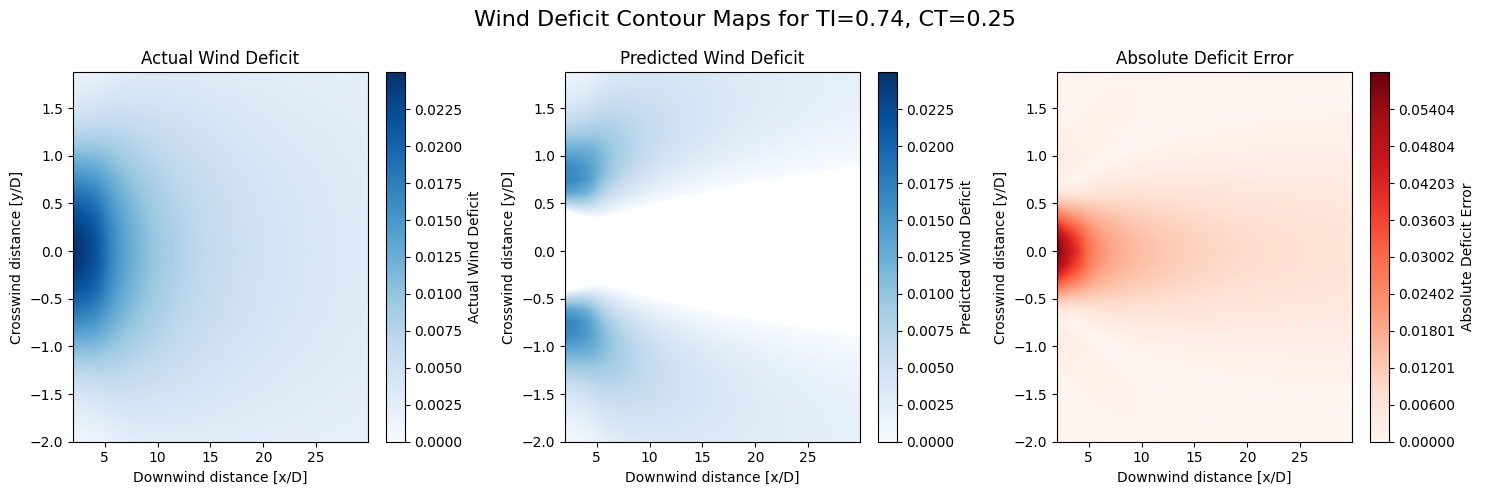

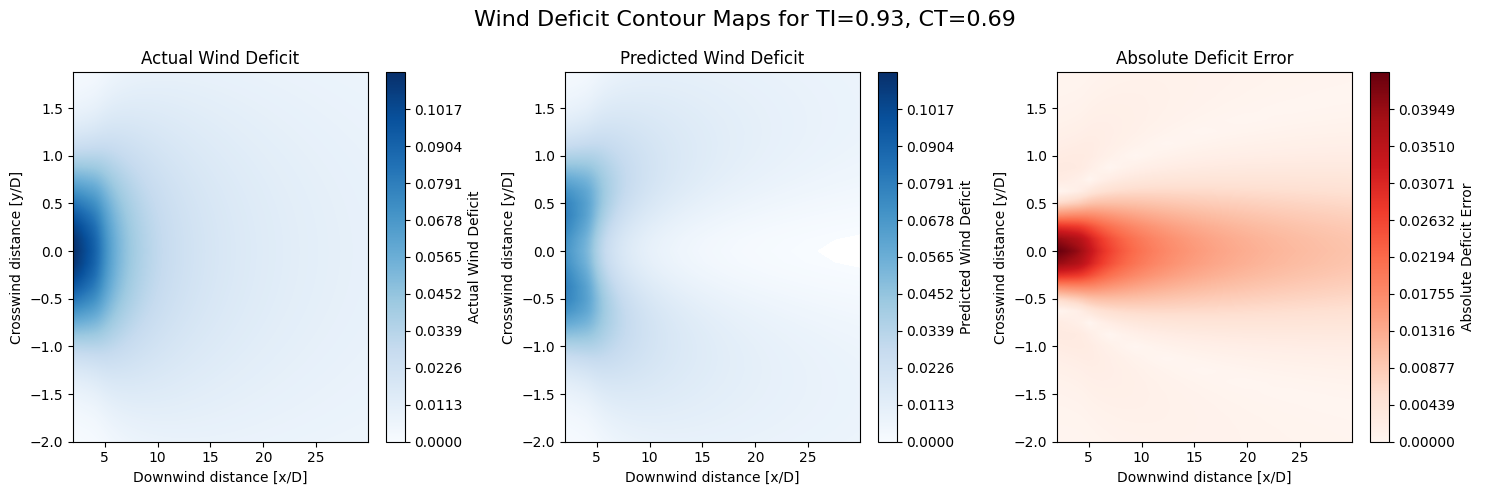

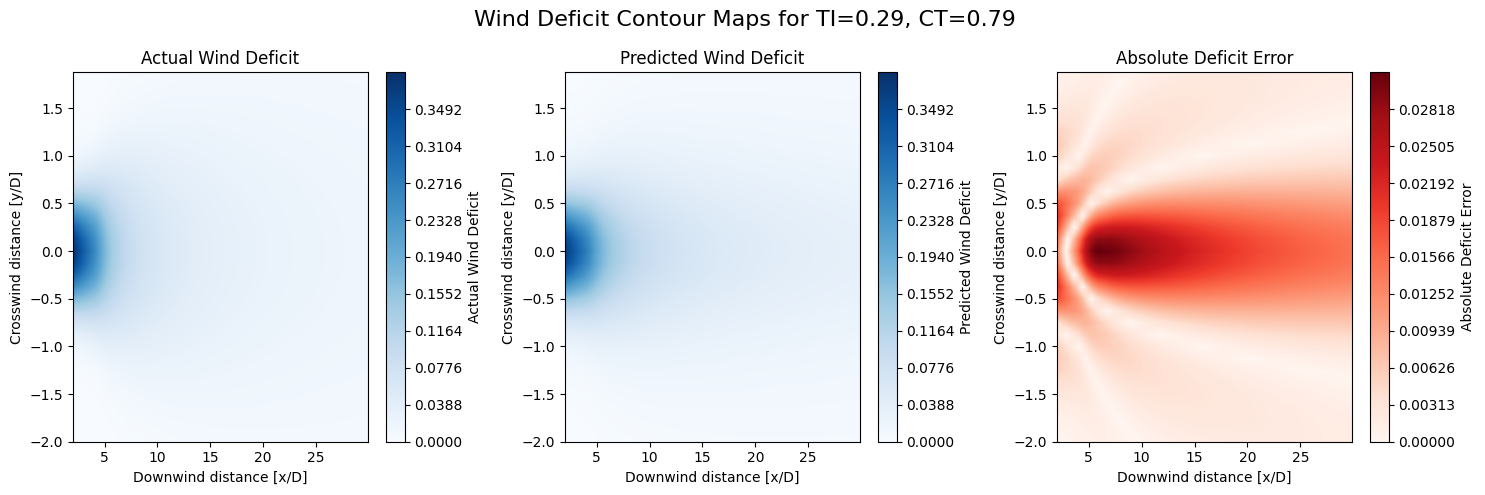

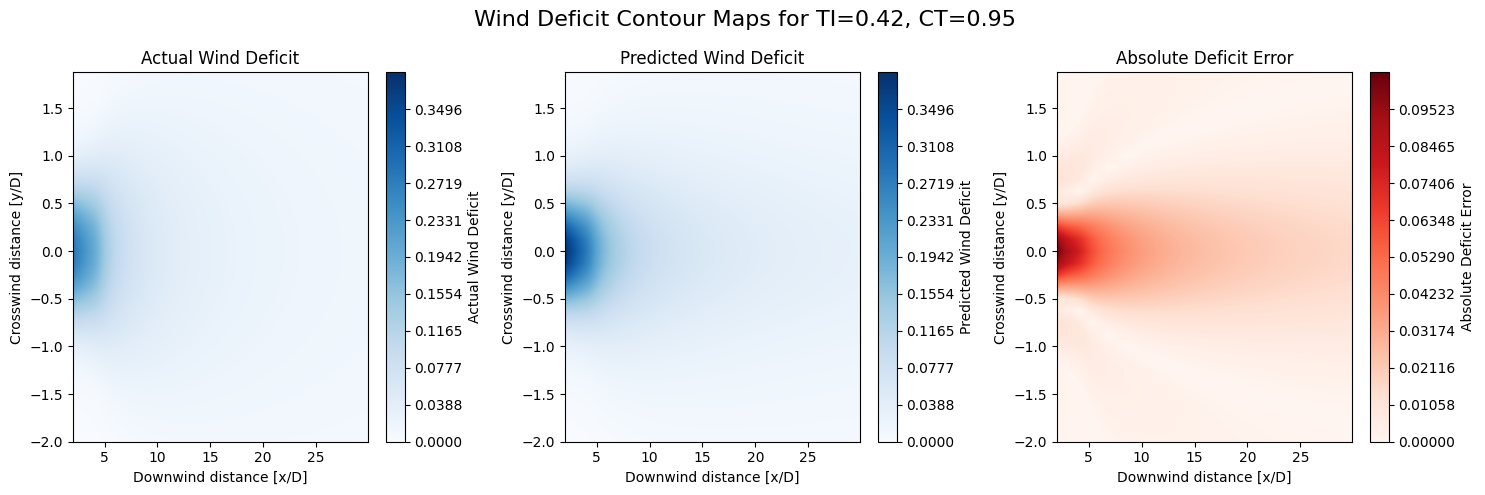

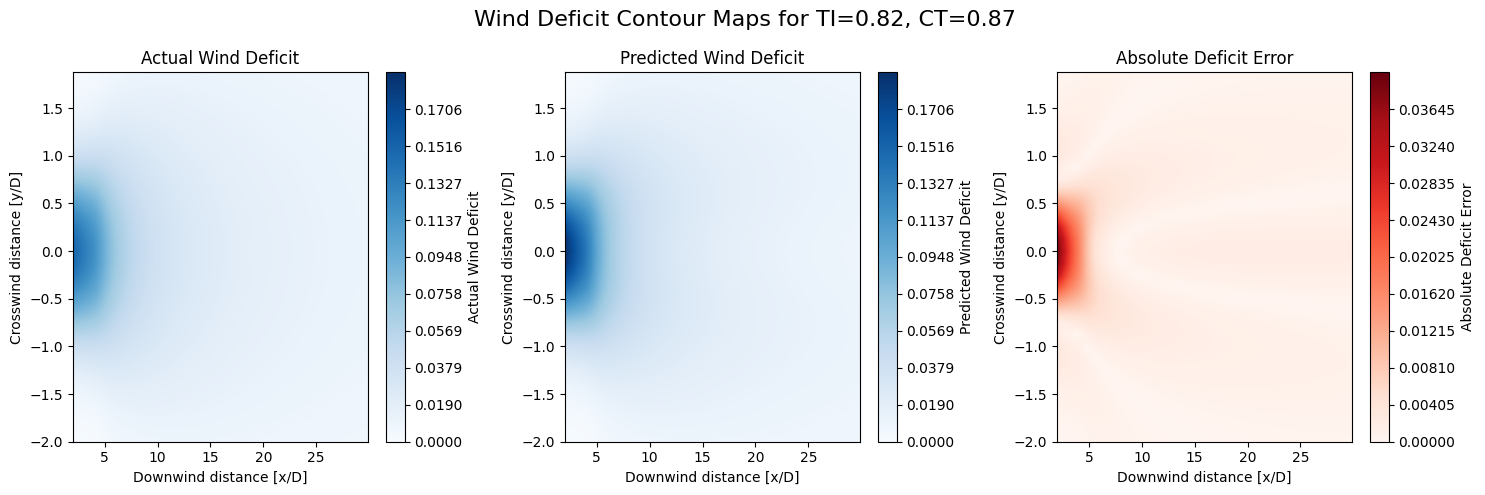

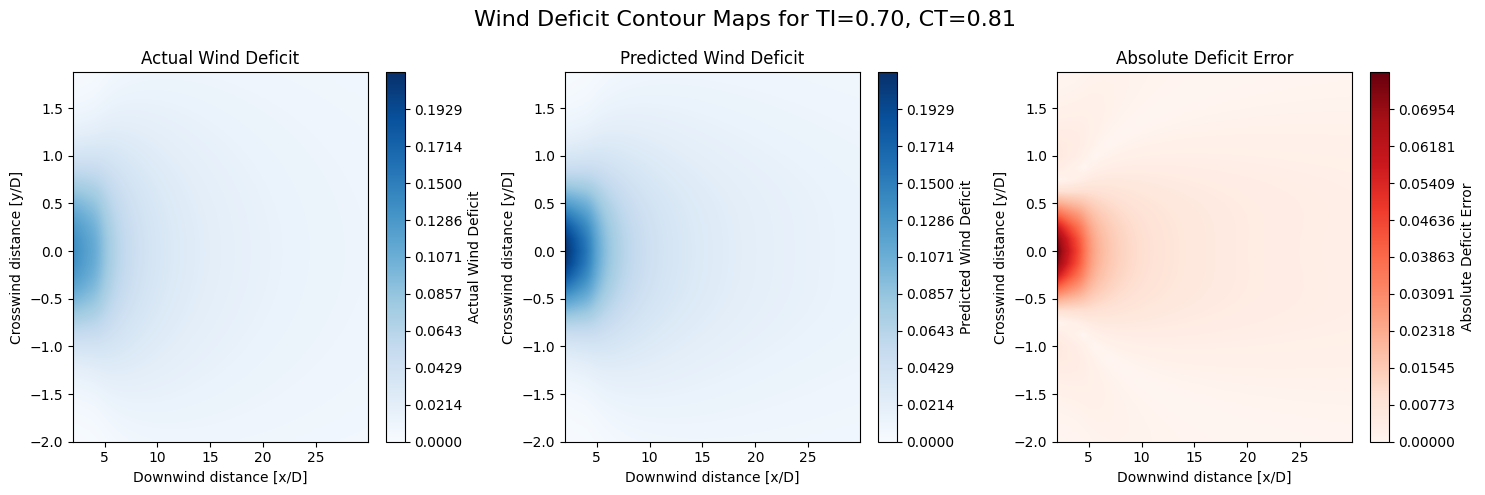

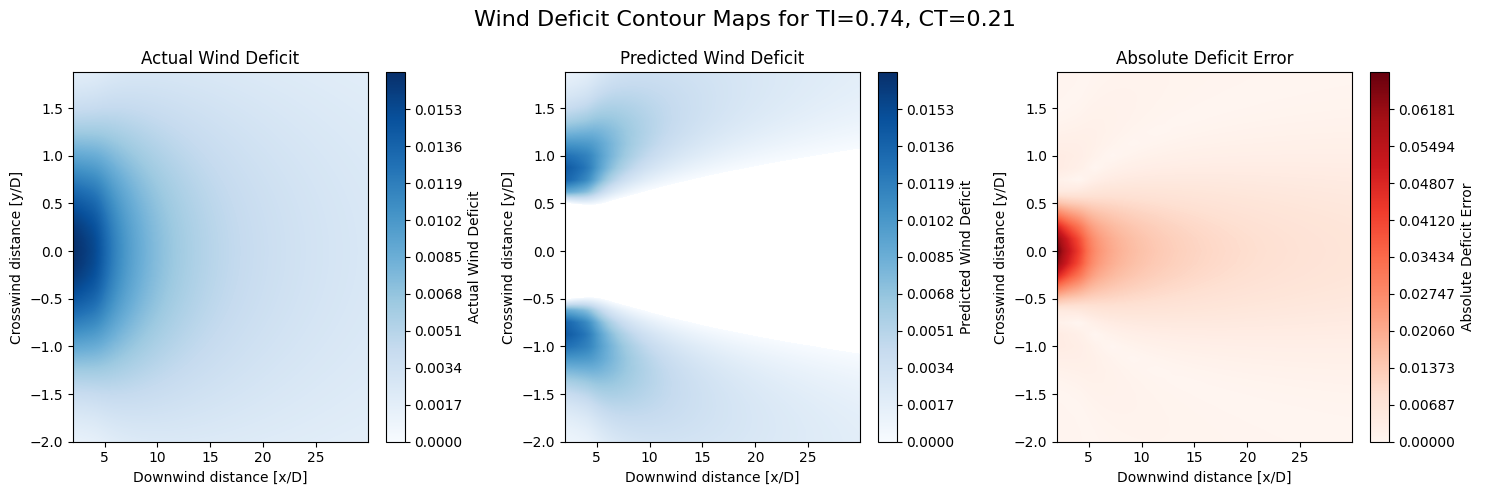

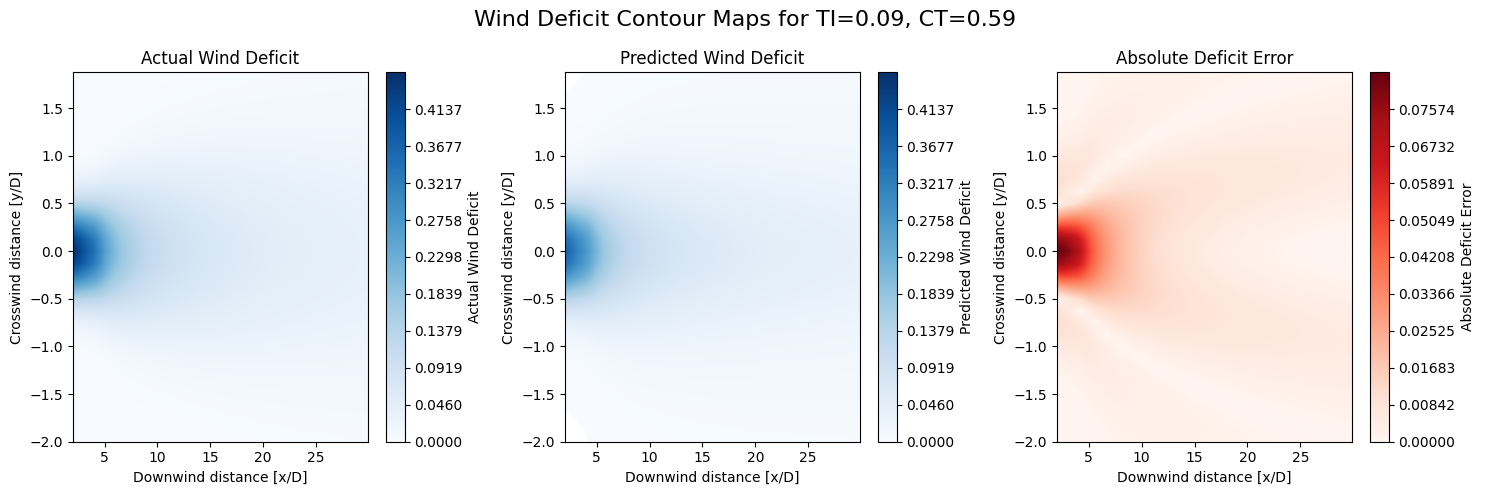

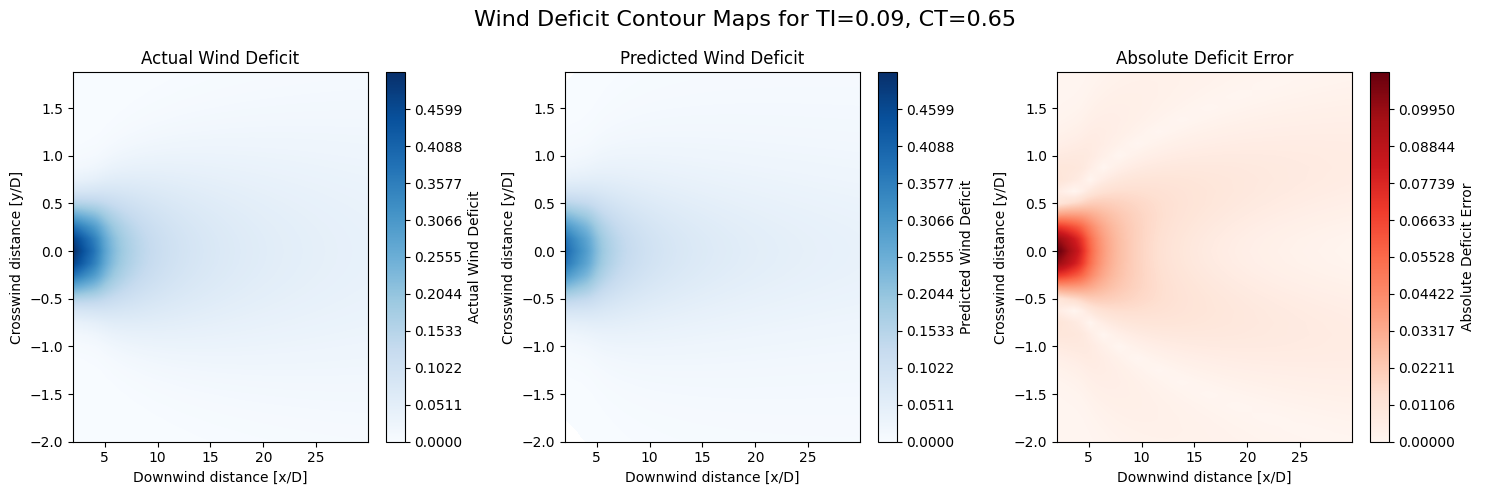

In [7]:
indices = list(range(len(test_dataset)))
random.shuffle(indices)

for idx in indices[:10]:
    ti, ct, ws, wake_field, predicted_wake_field = test_dataset.get_parameters_for_plotting_multivariate(model, idx)
    plotting.plot_maps(test_dataset.X_grid, test_dataset.Y_grid, wake_field, predicted_wake_field, ti, ct, ws, error_to_plot='absolute')